In [54]:
#Import libraries
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import os

#Data file path for Population Growth, Population, and Housing Supply Estimate
pop_growth = "../Datasets/Pop_Growth.csv"
house_supply = "../Datasets/Housing_Inventory_Estimate.csv"
pop = "../Datasets/US_Population.csv"
supply = "../Datasets/Monthly Supply of New Houses in the United States.csv"
prices = "../Datasets/Median_Sales_Price_Houses_US.csv"

In [55]:
#Read the CSV
pop_df = pd.read_csv(pop_growth)
housesupply_df = pd.read_csv(house_supply)
total_pop = pd.read_csv(pop)
supply_df = pd.read_csv(supply)
prices_df = pd.read_csv(prices)

supply_alt = supply_df

#Show Population growth
pop_df.head()

,DATE,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172


In [56]:
housesupply_df.head()

,DATE,ETOTALUSQ176N
0,2000-04-01,116047.0
1,2000-07-01,116482.0
2,2000-10-01,116914.0
3,2001-01-01,117347.0
4,2001-04-01,117786.0


In [57]:
total_pop.head()

,DATE,POPTHM
0,1959-01-01,175818.0
1,1959-02-01,176044.0
2,1959-03-01,176274.0
3,1959-04-01,176503.0
4,1959-05-01,176723.0


In [58]:
supply_df.head()

,DATE,MSACSR
0,1963-01-01,4.7
1,1963-02-01,6.6
2,1963-03-01,6.4
3,1963-04-01,5.3
4,1963-05-01,5.1


In [59]:
prices_df.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [60]:
#Merge the files
combined_df = pd.merge(pop_df, housesupply_df, how = "outer", on = "DATE")
combined_df = pd.merge(combined_df, total_pop, how = "outer", on = "DATE")
combined_df = pd.merge(combined_df, supply_df, how = "outer", on = "DATE")
combined_df = pd.merge(combined_df, prices_df, how = "outer", on = "DATE")

#Remove NA
combined_df = combined_df.dropna()

#Rename columns
supply_df = supply_df.rename(columns = {
     "DATE":"Date", 
    "MSACSR":"Supply"
})
combined_df = combined_df.rename(columns = {
    "DATE":"Date", 
    "ETOTALUSQ176N":"SupplyCount", 
    "SPPOPGROWUSA":"Population_Growth", 
    "POPTHM":"Total_Population",
    "MSPUS":"Price",
    "MSACSR":"Supply"
})

#Format the date
supply_df["Date"] = pd.to_datetime(supply_df["Date"])
supply_df["Date"] = supply_df["Date"].dt.year
combined_df["Date"] = pd.to_datetime(combined_df["Date"])
combined_df["Date"] = combined_df["Date"].dt.year

#Set field types
combined_df["SupplyCount"] = combined_df["SupplyCount"].astype(int)
combined_df["Total_Population"] = combined_df["Total_Population"].astype(int)
combined_df["Population_Growth"] = combined_df["Population_Growth"].astype(float)

combined_df.head()

,Date,Population_Growth,SupplyCount,Total_Population,Supply,Price
504,2001,0.989741,117347,283960,3.8,169800.0
516,2002,0.927797,119061,286739,4.2,188700.0
528,2003,0.859482,120792,289412,4.0,186000.0
540,2004,0.925484,122632,292046,3.8,212700.0
552,2005,0.921713,124611,294768,4.4,232500.0


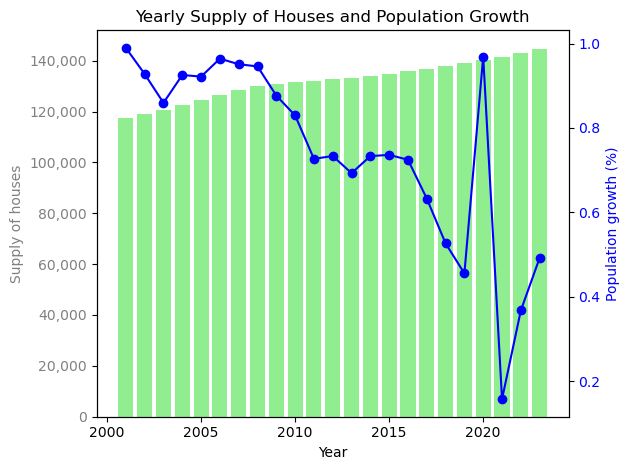

In [61]:
#Create the graph
fig, ax1 = plt.subplots()

#Bar 1 creation and labels
ax1.bar(combined_df['Date'], combined_df['SupplyCount'], color='lightgreen', label='House Supply')
ax1.set_xlabel('Year')
ax1.set_ylabel('Supply of houses', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

#Bar 2 creation and labels
ax2 = ax1.twinx()
ax2.plot(combined_df['Date'], combined_df['Population_Growth'], color='blue', marker='o', label='Population Growth')
ax2.set_ylabel('Population growth (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

#Set title
plt.title('Yearly Supply of Houses and Population Growth')
fig.tight_layout()

#Export graph to png
folder = "../Output/"  # Adjust the path as needed

# Ensure the folder exists, create it if it doesn't
if not os.path.exists(folder):
    os.makedirs(folder)

# Save the plot to the specified folder
plt.savefig(os.path.join(folder, 'Supply_vs_PopGrowth.png'), dpi=600)

plt.show()


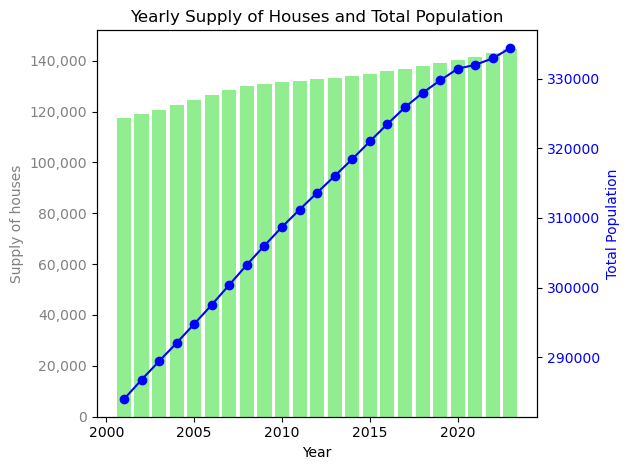

In [62]:
fig, ax1 = plt.subplots()

ax1.bar(combined_df['Date'], combined_df['SupplyCount'], color='lightgreen', label='House Supply')
ax1.set_xlabel('Year')
ax1.set_ylabel('Supply of houses', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax2 = ax1.twinx()
ax2.plot(combined_df['Date'], combined_df['Total_Population'], color='blue', marker='o', label='Total_Population')
ax2.set_ylabel('Total Population', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')



plt.title('Yearly Supply of Houses and Total Population')
fig.tight_layout()

#Export graph to png
folder = "../Output/"  # Adjust the path as needed

# Ensure the folder exists, create it if it doesn't
if not os.path.exists(folder):
    os.makedirs(folder)

# Save the plot to the specified folder
plt.savefig(os.path.join(folder, 'Supply_vs_TotalPop.png'), dpi=600)

plt.show()


In [63]:
average_household_size = 2.5  # Average number of people per household

combined_df['Population increase'] = combined_df['Total_Population'].diff().fillna(0)
combined_df['Housing demand'] = combined_df['Population increase'] / average_household_size

In [64]:
print(combined_df[['Date', 'Population increase', 'Housing demand']])


     Date  Population increase  Housing demand
504  2001                  0.0             0.0
516  2002               2779.0          1111.6
528  2003               2673.0          1069.2
540  2004               2634.0          1053.6
552  2005               2722.0          1088.8
564  2006               2758.0          1103.2
576  2007               2872.0          1148.8
588  2008               2882.0          1152.8
600  2009               2755.0          1102.0
612  2010               2671.0          1068.4
624  2011               2498.0           999.2
636  2012               2432.0           972.8
648  2013               2402.0           960.8
660  2014               2426.0           970.4
672  2015               2533.0          1013.2
684  2016               2512.0          1004.8
696  2017               2392.0           956.8
708  2018               2068.0           827.2
720  2019               1797.0           718.8
732  2020               1677.0           670.8
744  2021    

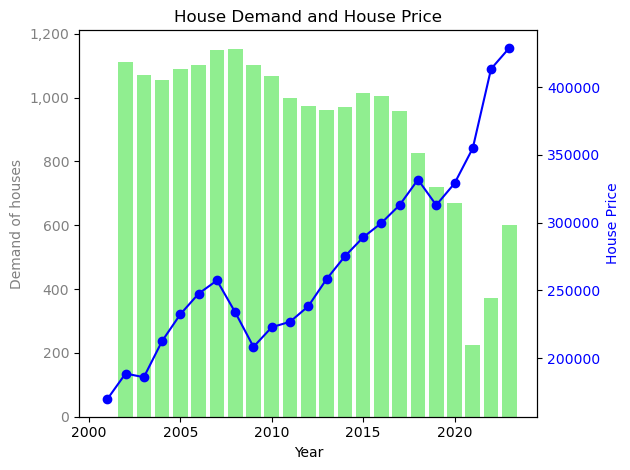

In [65]:
fig, ax1 = plt.subplots()

ax1.bar(combined_df['Date'], combined_df['Housing demand'], color='lightgreen', label='House Demand')
ax1.set_xlabel('Year')
ax1.set_ylabel('Demand of houses', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax2 = ax1.twinx()
ax2.plot(combined_df['Date'], combined_df['Price'], color='blue', marker='o', label='Median Sale Price')
ax2.set_ylabel('House Price', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')



plt.title('House Demand and House Price')
fig.tight_layout()

#Export graph to png
folder = "../Output/"  # Adjust the path as needed

# Ensure the folder exists, create it if it doesn't
if not os.path.exists(folder):
    os.makedirs(folder)

# Save the plot to the specified folder
plt.savefig(os.path.join(folder, 'Demand.png'), dpi=600)

plt.show()


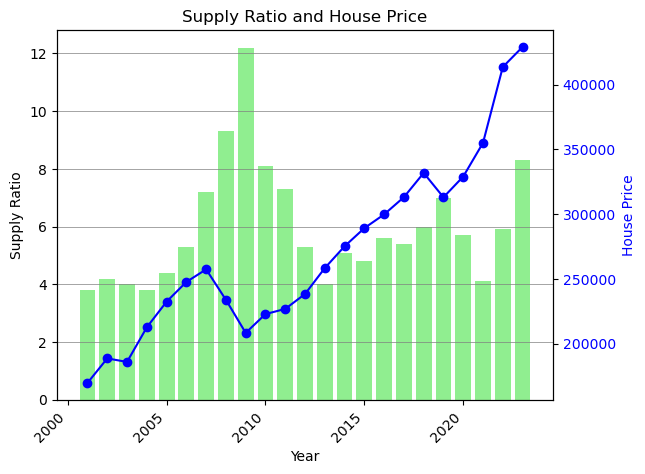

<Figure size 1000x600 with 0 Axes>

In [66]:
fig, ax1 = plt.subplots()

plt.figure(figsize=(10, 6))
ax1.bar(combined_df['Date'], combined_df['Supply'], color='lightgreen')

# Add labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Supply Ratio')
ax1.set_title('Supply Ratio and House Price')
#ax.xticks(supply_df['Date'])

ax2 = ax1.twinx()
ax2.plot(combined_df['Date'], combined_df['Price'], color='blue', marker='o', label='House Price')
ax2.set_ylabel('House Price', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Rotate the x-axis labels for better readability
#ax.set_xticks(supply_df['Date'], rotation=45, ha='right')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()

ax1.grid(visible=True, axis='y', which='major', linestyle='-', color='grey', linewidth=0.5)



#Export graph to png
folder = "../Output/"  # Adjust the path as needed

# Ensure the folder exists, create it if it doesn't
if not os.path.exists(folder):
    os.makedirs(folder)

# Save the plot to the specified folder
fig.savefig(os.path.join(folder, 'Supply.png'), dpi=600)
plt.show()

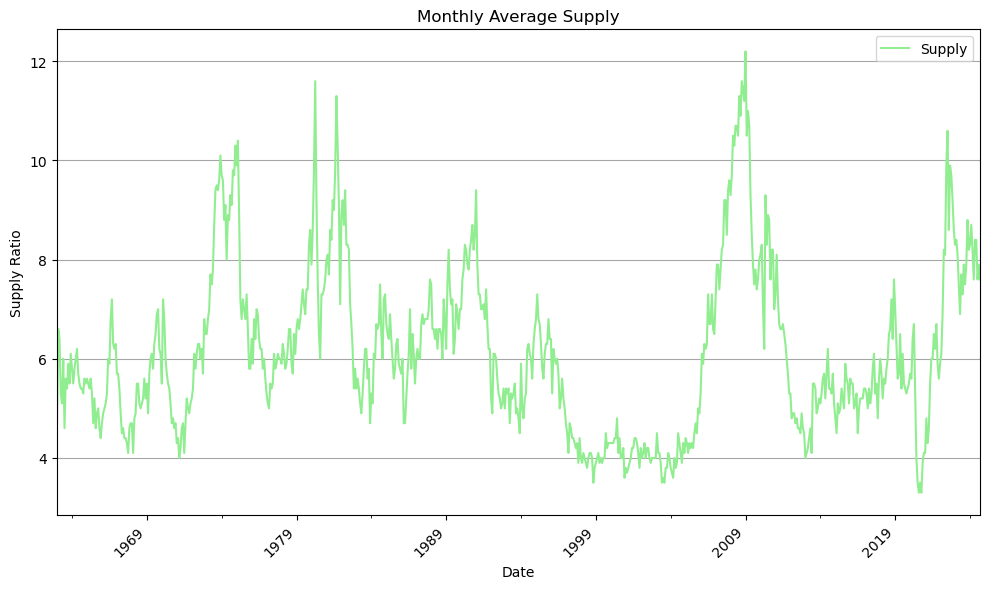

In [67]:
# Convert 'Date' column to datetime and set it as the index
supply_alt = supply_alt.rename(columns = {"MSACSR":"Supply"})
supply_alt['DATE'] = pd.to_datetime(supply_alt['DATE'])
supply_alt.set_index('DATE', inplace=True)

# Resample the data to get the monthly average, using 'ME' for month-end
monthly_average = supply_alt.resample('ME').mean()

# Plot the time series
fig, ax = plt.subplots(figsize=(10, 6))
monthly_average.plot(ax=ax, color='lightgreen')
ax.set_title('Monthly Average Supply')
ax.set_xlabel('Date')
ax.set_ylabel('Supply Ratio')

#ax.xaxis.set_major_locator(YearLocator(10, month=1, day=1))  # Set interval to 10 years
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x)))
#ax.set_xlim(left=pd.Timestamp("1965-01-01"))

ax.grid(axis='y', linestyle='-', color='gray', alpha=0.7)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
